In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline


In [26]:
df=pd.read_excel("italy.new.xlsx")

In [27]:
df=df.groupby(df['Date']).sum()

In [28]:
day=pd.Series([1,2,3,4,5,6])

In [29]:
dfSum=df['Confirmed Cases']

In [30]:
dfSum

Date
2020-02-03     153
2020-02-07     270
2020-02-11     395
2020-02-15     526
2020-02-19     924
2020-02-23    1696
Name: Confirmed Cases, dtype: int64

In [31]:
df.reset_index()

,Date,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
0,2020-02-03,153,6,1,123,24
1,2020-02-07,270,66,1,150,54
2,2020-02-11,395,146,1,165,84
3,2020-02-15,526,229,2,170,127
4,2020-02-19,924,570,3,174,180
5,2020-02-23,1696,965,17,178,626


In [32]:
df=df[['Confirmed Cases']]

In [33]:
df.set_index(day)

,Confirmed Cases
1,153
2,270
3,395
4,526
5,924
6,1696


In [34]:
cases=df['Confirmed Cases']

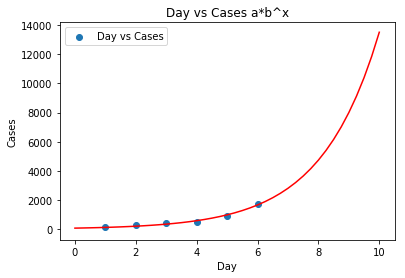

In [35]:
def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day, cases, p0=[1, 1e-6])
x_plot=np.linspace(0,10,41)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,cases,label='Day vs Cases')
plt.title("Day vs Cases a*b^x")
plt.xlabel('Day')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [37]:
y_plot=func3(x_plot,*popt)

In [38]:
expDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [39]:
expDf.to_csv(r'exp-italy.csv')